# Assignment 1: Image Manipulation and Canny Edge Detection

---

Dr.-Ing. Antje Muntzinger, Hochschule für Technik Stuttgart

antje.muntzinger@hft-stuttgart.de

---

In this notebook, we practice some basic image manipulation techniques in OpenCV including Canny edge detection. These are the foundation of later computer vision applications.

In [1]:
# install required packages specified in pipfile
!pipenv install

Courtesy Notice: Pipenv found itself running within a virtual environment, so it will automatically use that environment, instead of creating its own for any project. You can set PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and create its own instead. You can set PIPENV_VERBOSITY=-1 to suppress this warning.
Installing dependencies from Pipfile.lock (fd2ab2)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.


In [2]:
# imports
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np 
import cv2

## check virtual environment
import os
if 'VIRTUAL_ENV' in os.environ:
    print("In a virtual environment located at:", os.environ['VIRTUAL_ENV'])
else:
    print("Not in a virtual environment.")

In a virtual environment located at: /Users/abhishekkumar/.local/share/virtualenvs/CV_Assignment-P1kda-6r


Task 1: Basic Image Manipulation in OpenCV
=

**TODO**: 1a) Load a color image of your choice, preferably a picture you took yourself. Convert it to a color format of your choice, and display it. **(1.5 points)**

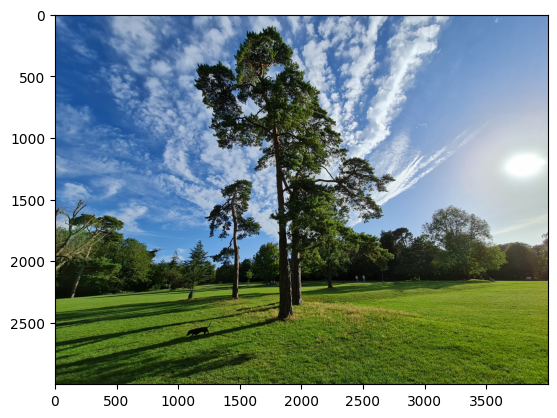

In [8]:
##### TODO: YOUR CODE GOES HERE

image = cv2.imread("pic1.jpg", 1)

img_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(img_RGB)

**TODO**: 1b) Color the 10th pixel row of the image in red. Plot the upper left 500x500 pixel image cutout to verify your result. **(2 points)** 

Hint: Indexing starts at 0 in Python! Remember the image origin is in the upper left image corner.

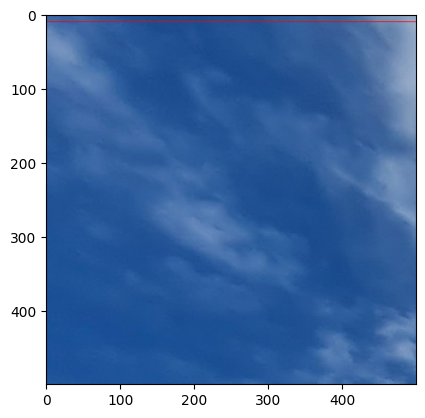

In [9]:
##### TODO: YOUR CODE GOES HERE
img_RGB[10, :, :] = [255, 0, 0]

plt.imshow(img_RGB[:500, :500])

plt.show()

**TODO**: 1c) Print the color values of the rightmost Pixel in the 9th row, as well as the color values of the leftmost Pixel in the 10th row. **(2 points)** 

In [11]:
##### TODO: YOUR CODE GOES HERE
# Print the color values of the rightmost pixel in the 9th row
rightmost_pixel_9th_row = img_RGB[8, -1]
print("Color values of the rightmost pixel in the 9th row:", rightmost_pixel_9th_row)

# Print the color values of the leftmost pixel in the 10th row
leftmost_pixel_10th_row = img_RGB[9, 0]
print("Color values of the leftmost pixel in the 10th row:", leftmost_pixel_10th_row)

Color values of the rightmost pixel in the 9th row: [118 151 202]
Color values of the leftmost pixel in the 10th row: [118 151 202] [ 67 107 168]


**TODO**: 1d) Flatten the image, i.e., convert it from the 3D array to a 1D array. Find at least two different commands that achieve the desired result. Check your output with `shape`. **(3 points)**

In [12]:
##### TODO: YOUR CODE GOES HERE
flattened_image_reshape = img_RGB.reshape(-1, img_RGB.shape[-1])
print("Shape of flattened image (using reshape):", flattened_image_reshape.shape)

flattened_image_flatten = img_RGB.flatten()
print("Shape of flattened image (using flatten):", flattened_image_flatten.shape)

Shape of flattened image (using reshape): (12000000, 3)
Shape of flattened image (using flatten): (36000000,)


**TODO**: 1e) As before, print the color values of the rightmost Pixel in the 9th row, as well as the color values of the leftmost Pixel in the 10th row, but use the flattened image now. Verify that the result is the same as before. **(2 points)**

In [13]:
##### TODO: YOUR CODE GOES HERE
# Print the color values of the rightmost pixel in the 9th row using the flattened image
rightmost_pixel_9th_row_flattened = flattened_image_reshape[8 * img_RGB.shape[1] + img_RGB.shape[1] - 1]
print("Color values of the rightmost pixel in the 9th row (flattened):", rightmost_pixel_9th_row_flattened)

# Print the color values of the leftmost pixel in the 10th row using the flattened image
leftmost_pixel_10th_row_flattened = flattened_image_reshape[9 * img_RGB.shape[1]]
print("Color values of the leftmost pixel in the 10th row (flattened):", leftmost_pixel_10th_row_flattened)

Color values of the rightmost pixel in the 9th row (flattened): [118 151 202]
Color values of the leftmost pixel in the 10th row (flattened): [ 67 107 168]


**TODO**: 1f) Split the three color channels and display them separately. Can you see from the plotted images which color channel is displayed in which image (without looking at the code), or do the three channels not differ much? Write your answer in the markdown cell below the code. **(2 points)**

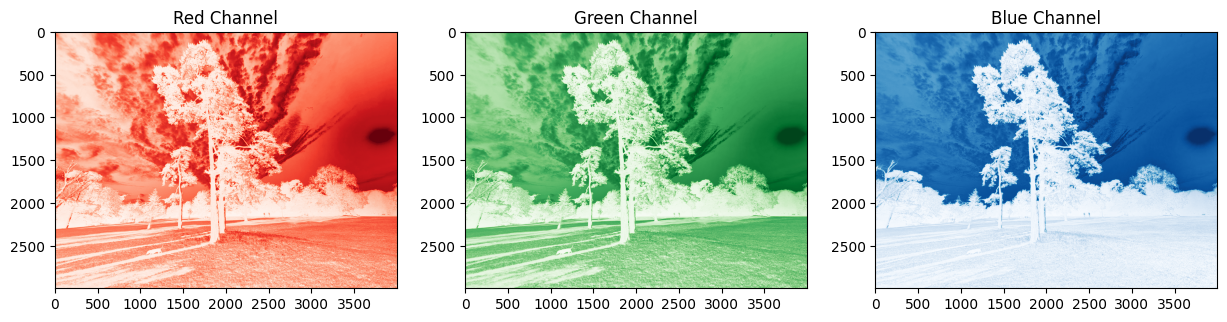

In [14]:
##### TODO: YOUR CODE GOES HERE
# Split the RGB channels
red_channel = img_RGB[:, :, 0]
green_channel = img_RGB[:, :, 1]
blue_channel = img_RGB[:, :, 2]

# Display each color channel separately
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title('Red Channel')

axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title('Green Channel')

axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title('Blue Channel')

plt.show()

**YOUR ANSWER**: 

Task 2: Edge Detection
=

**TODO**: 2a) Choose a part of the image that you find interesting for later corner and edge detection. Store the cutout in a new grayscale image. **(1 point)**

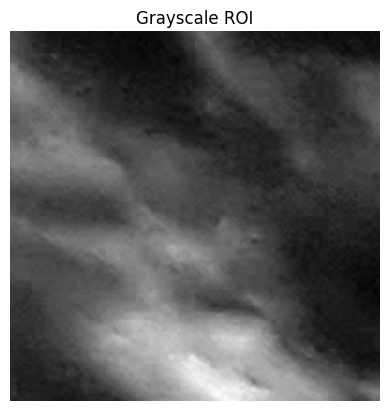

In [15]:
##### TODO: YOUR CODE GOES HERE
top_left = (100, 100)  # Example coordinates
bottom_right = (300, 300)  # Example coordinates

# Extract the region of interest (ROI) from the original image
roi = img_RGB[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

# Convert the ROI to grayscale
gray_roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.imshow(gray_roi, cmap='gray')
plt.title('Grayscale ROI')
plt.axis('off')
plt.show()

**TODO**: 2b) Find a part of the cutout that you think might be difficult to detect edges in with Canny. Mark this part in the grayscale cutout with a red square. Write a short explanation why this could be difficult below. **(2 points)**

Hint: Note that you cannot plot color into a grayscale image. One option is to convert the grayscale image to RGB first, using `COLOR_GRAY2RGB`.

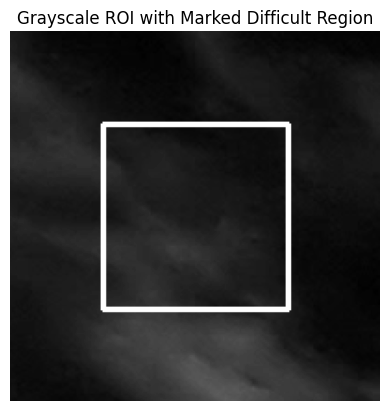

In [16]:
##### TODO: YOUR CODE GOES HERE
difficult_region_top_left = (50, 50)  # Example coordinates
difficult_region_bottom_right = (150, 150)  # Example coordinates

# Draw a red square around the difficult region on the grayscale image
marked_gray_roi = cv2.rectangle(gray_roi.copy(), difficult_region_top_left, difficult_region_bottom_right, (255, 0, 0), 2)

# Display the marked grayscale image
plt.imshow(marked_gray_roi, cmap='gray')
plt.title('Grayscale ROI with Marked Difficult Region')
plt.axis('off')
plt.show()

**YOUR ANSWER**: 

**TODO**: 2c) Resize the gray cutout to 1/4th of the original size, keeping the aspect ratio. Plot both grayscale images next to each other using Matplotlib's `subplots`.

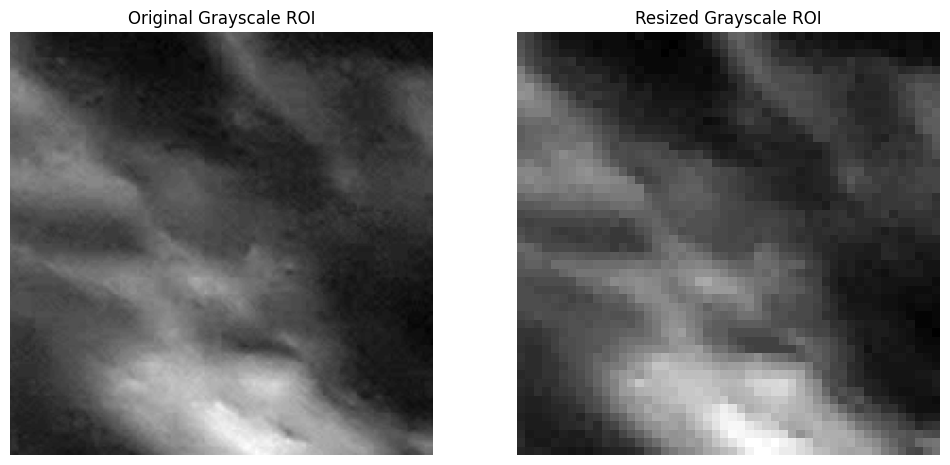

In [17]:
##### TODO: YOUR CODE GOES HERE
new_height = gray_roi.shape[0] // 4
new_width = gray_roi.shape[1] // 4

# Resize the grayscale cutout while maintaining the aspect ratio
resized_gray_roi = cv2.resize(gray_roi, (new_width, new_height))

# Create subplots for displaying both grayscale images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original grayscale image
axes[0].imshow(gray_roi, cmap='gray')
axes[0].set_title('Original Grayscale ROI')
axes[0].axis('off')

# Plot the resized grayscale image
axes[1].imshow(resized_gray_roi, cmap='gray')
axes[1].set_title('Resized Grayscale ROI')
axes[1].axis('off')

plt.show()

**TODO**: 2d) Apply Gaussian blur with a kernel of size 9 to the resized image and plot the result. **(1 point)**

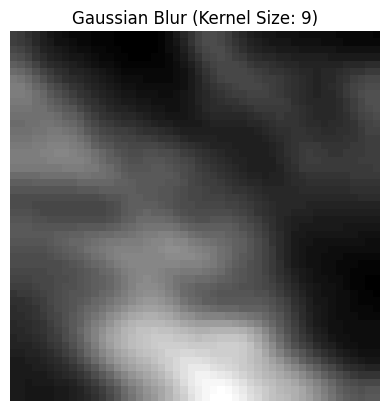

In [18]:
##### TODO: YOUR CODE GOES HERE
blurred_resized_gray_roi = cv2.GaussianBlur(resized_gray_roi, (9, 9), 0)

# Plot the result
plt.imshow(blurred_resized_gray_roi, cmap='gray')
plt.title('Gaussian Blur (Kernel Size: 9)')
plt.axis('off')
plt.show()

**TODO**: 2e) Detect the edges in the blurred cutout using Canny edge detector. Adapt the Canny thresholds for an optimal result. Plot the edges in blue into the grayscale cutout. **(3 points)** 

**TODO**: 2f) Check if your prediction of difficulty was correct. Do you see a) real edges that were missed by Canny (false negatives) or b) detected edges that are not there in reality (false positives)? Try to experiment with the Canny thresholds and solve these difficulties. How did you try to solve the difficulties? Write your answer below the code. **(1.5 points)**

**YOUR ANSWER**: 

Well done, you are now able to apply basic image manipulation techniques as well as Canny edge detection to images in OpenCV! 

Task 3: Theory Questions
=

**TODO**: 3a) What is the problem of applying image derivatives for edge detection in noisy images? What is a possible solution to that problem? Can you give an example in which you often get noise when taking a photo? **(3 points)**

**YOUR ANSWER**: 

**TODO**: 3b) You are given a 3×3 pixel input image $
\begin{array}{|ccc|}
\hline
 1 & 2 & 3  \\ 
 4 & 5 & 6  \\ 
 7 & 8 & 9  \\ 
\hline   
\end{array}$
and a 3×3 pixel filter $\begin{array}{|ccc|}
\hline
 -1 & 0 & 1  \\ 
 -1 & 0 & 1  \\ 
 -1 & 0 & 1  \\ 
\hline   
\end{array}$. Compute the 3 × 3 pixel result image of the correlation of the filter with the input image. All pixels outside the input image are padded with zeros. **(4.5 points)**

**YOUR ANSWER**: 


**TODO**: 3c) What patterns does this special filter respond to? How can you see this in the result from 3b)? **(2 points)**

**YOUR ANSWER**: 

**TODO**: 3d) Please calculate the result using the settings from task 3b), but with convolution instead of correlation. **(4.5 points)**

**YOUR ANSWER**: 
